<a href="https://colab.research.google.com/github/Dcorder123/Estudo_Dirigido_Controle_Automacao_2025.2/blob/main/Controle_e_Automa%C3%A7%C3%A3o_cap_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

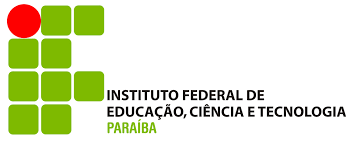

<center>

INSTITUTO FEDERAL DE CIÊNCIA E TECNOLOGIA DA PARAÍBA

CAMPUS CAMPINA GRANDE

BACHARELADO EM ENGENHARIA DA COMPUTAÇÃO

DISCIPLINA: CONTROLE E AUTOMAÇÃO

PROFESSOR: MOACY PEREIRA DA SILVA

<center>

<br>
<br>
<br>

**ESTUDO DIRIGIDO DA DISCIPLINA: CONTROLE E AUTOMAÇÃO**

<br>

**Entrega 02**

<br>
<br>

Daniel Barbosa Vasconcelos

<center>

<br>
<br>
<br>

26 de novembro de 2025 <br>
Campina Grande, PB

# Resumo: Capítulo 7 - O Método do Lugar das Raízes
### Fonte: Sistemas de Controle Modernos (Dorf & Bishop)

O **Método do Lugar das Raízes (Root Locus - LGR)** é uma técnica gráfica poderosa usada para analisar e projetar a estabilidade e a resposta transitória de sistemas de controle. Ele mostra como as raízes da equação característica (pólos de malha fechada) se movem no plano complexo $s$ à medida que um parâmetro do sistema (geralmente o ganho $K$) varia.

---

## 1. Fundamentos Teóricos
A base do método reside na equação característica do sistema em malha fechada. Para um sistema com função de transferência de malha aberta $KG(s)H(s)$, a equação característica é:

$$1 + K G(s)H(s) = 0$$

Para que um ponto $s$ no plano complexo pertença ao Lugar das Raízes, ele deve satisfazer duas condições fundamentais:

1.  **Condição de Ângulo (Essencial para o traçado):**
    $$\angle G(s)H(s) = \pm 180^\circ (2k + 1), \quad k = 0, 1, 2, \dots$$
2.  **Condição de Módulo (Para determinar o valor de K no ponto):**
    $$|K G(s)H(s)| = 1 \implies K = \frac{1}{|G(s)H(s)|}$$

---

## 2. Algoritmo para Construção do LGR
O livro apresenta um procedimento passo-a-passo para esboçar o lugar das raízes conforme $K$ varia de $0$ a $+\infty$:

1.  **Número de Ramos:** O número de ramos do LGR é igual ao número de pólos da função de malha aberta $P(s)$.
2.  **Início e Fim:** Os ramos começam nos pólos de malha aberta (onde $K=0$) e terminam nos zeros de malha aberta (onde $K=\infty$) ou no infinito.
3.  **Eixo Real:** Um ponto no eixo real pertence ao LGR se a soma total de pólos e zeros reais à sua direita for um número **ímpar**.
4.  **Assíntotas:** Para ramos que vão para o infinito, eles seguem assíntotas centradas no eixo real.
    * **Centróide ($\sigma_A$):** Ponto de interseção das assíntotas no eixo real.
        $$\sigma_A = \frac{\sum \text{pólos finitos} - \sum \text{zeros finitos}}{n - m}$$
        *(onde $n$ é o nº de pólos e $m$ é o nº de zeros)*
    * **Ângulo das Assíntotas ($\phi_A$):**
        $$\phi_A = \frac{(2k+1)180^\circ}{n - m}$$
5.  **Ponto de Ruptura (Breakaway/Break-in):** Pontos onde os ramos saem ou entram no eixo real. Geralmente ocorrem onde a derivada de $K$ em relação a $s$ é zero ($\frac{dK}{ds} = 0$).
6.  **Ângulo de Partida/Chegada:** Importante para pólos e zeros complexos. Calculado usando a condição de ângulo (soma dos ângulos).
7.  **Cruzamento do Eixo Imaginário:** Determina a estabilidade. Pode ser encontrado usando o critério de Routh-Hurwitz ou fazendo $s = j\omega$ na equação característica.

---

## 3. Seleção de Parâmetros e Projeto
O LGR não serve apenas para análise, mas para **projeto**.

* **Ajuste de Ganho:** Podemos escolher um valor de $K$ específico para posicionar os pólos de malha fechada em uma posição que garanta um determinado coeficiente de amortecimento ($\zeta$) e frequência natural ($\omega_n$).
* **Adição de Pólos e Zeros:**
    * **Adicionar um Pólo:** Tende a empurrar o lugar das raízes para a direita (diminui a estabilidade relativa e deixa o sistema mais lento).
    * **Adicionar um Zero:** Tende a puxar o lugar das raízes para a esquerda (aumenta a estabilidade e acelera a resposta).

---

## 4. Controladores PID e o LGR
O capítulo introduz como os controladores clássicos alteram o LGR:

* **Controlador Proporcional (P):** Apenas altera o ganho $K$. Não muda a forma do LGR.
* **Controlador Integral (I ou PI):** Adiciona um pólo na origem (ou próximo dela). Aumenta o tipo do sistema e elimina erro em regime estacionário, mas pode reduzir a estabilidade.
* **Controlador Derivativo (D ou PD):** Adiciona um zero. Melhora o amortecimento e a estabilidade, permitindo ganhos maiores e respostas mais rápidas.
* **PID:** Combina as vantagens: o termo integral melhora o regime permanente e o termo derivativo melhora a resposta transitória.

> **Nota:** O projeto consiste em colocar pólos e zeros do controlador de forma a remodelar o lugar das raízes para que ele passe pelos locais desejados no plano-s.

---

## 5. Resumo Visual: Efeitos no Lugar das Raízes

| Ação | Efeito no LGR | Efeito no Sistema |
| :--- | :--- | :--- |
| **Aumentar K** | Move pólos ao longo dos ramos | Altera estabilidade e oscilação |
| **Adicionar Pólo** | Ramos se curvam para a direita | Piora estabilidade, resposta mais lenta |
| **Adicionar Zero** | Ramos se curvam para a esquerda | Melhora estabilidade, resposta mais rápida |

---
*Baseado no Capítulo 7 de Dorf, Richard C. & Bishop, Robert H. "Sistemas de Controle Modernos", 8ª Edição.*


###  Configuração Inicial

Antes de rodar os exemplos, instale e importe as bibliotecas necessárias no seu notebook:






In [6]:
# Instalação da biblioteca de controle (necessário no Colab)
!pip install control

import numpy as np
import matplotlib.pyplot as plt
import control as ct



### 1\. Exemplo 7.1: O Lugar das Raízes Básico

**Objetivo:** Visualizar como os pólos de malha fechada se movem com a variação do ganho $K$ para um sistema simples de terceira ordem.

**Sistema:** $G(s) = \frac{1}{s(s+4)(s+6)}$
**Função de Malha Aberta:** $L(s) = \frac{K}{s^3 + 10s^2 + 24s}$

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-94834123.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("Eixo Real ($\sigma$)")
/tmp/ipython-input-94834123.py:16: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("Eixo Imaginário ($j\omega$)")
/usr/local/lib/python3.12/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


Função de Transferência de Malha Aberta:
<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

           1
  -------------------
  s^3 + 10 s^2 + 24 s


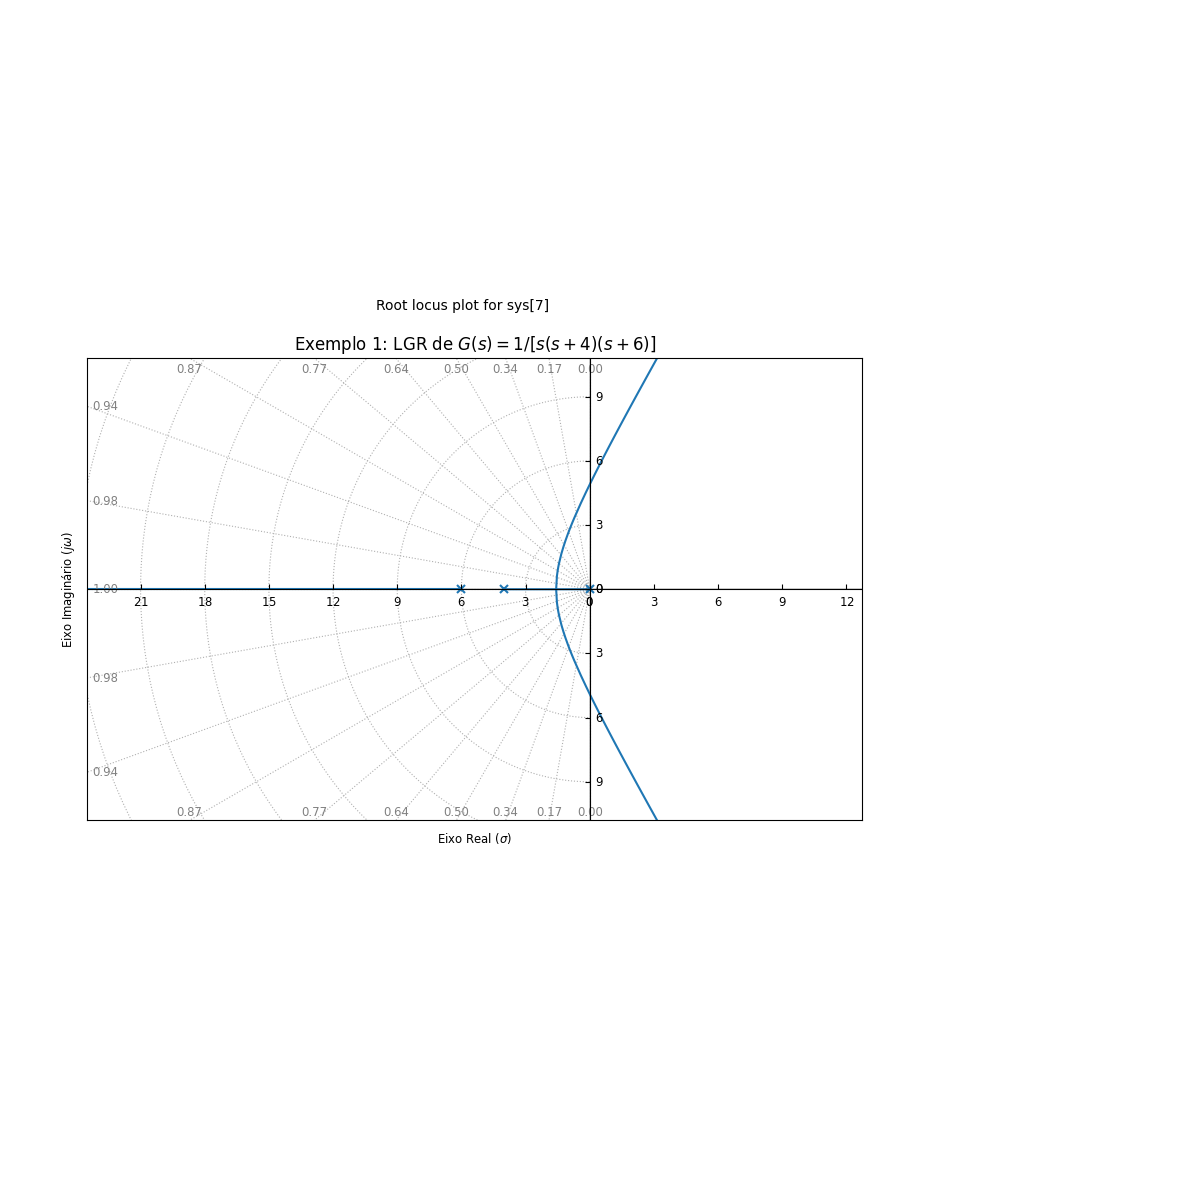

In [7]:
# Definindo a função de transferência de malha aberta (sem o ganho K)
# Numerador = 1
# Denominador = s(s+4)(s+6) = s(s^2 + 10s + 24) = s^3 + 10s^2 + 24s
num = [1]
den = [1, 10, 24, 0]
G = ct.tf(num, den)

print("Função de Transferência de Malha Aberta:")
print(G)

# Plotando o Lugar das Raízes
plt.figure(figsize=(10, 6))
ct.root_locus(G, plot=True, grid=True)
plt.title("Exemplo 1: LGR de $G(s) = 1 / [s(s+4)(s+6)]$")
plt.xlabel("Eixo Real ($\sigma$)")
plt.ylabel("Eixo Imaginário ($j\omega$)")
plt.show()

# Interpretação:
# Observe que dois ramos eventualmente cruzam o eixo imaginário.
# Isso indica que para um ganho K muito alto, o sistema se tornará instável.

### 2\. Análise de Projeto: Escolhendo o Ganho $K$

**Objetivo:** Determinar o valor de $K$ para que o sistema tenha um coeficiente de amortecimento específico ($\zeta$), o que dita o "overshoot" (sobrepasso) da resposta ao degrau.

**Meta:** $\zeta = 0.5$ (Isso corresponde a um overshoot de aproximadamente 16%).
**Sistema:** Mesmo do exemplo anterior.



/tmp/ipython-input-1476808574.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


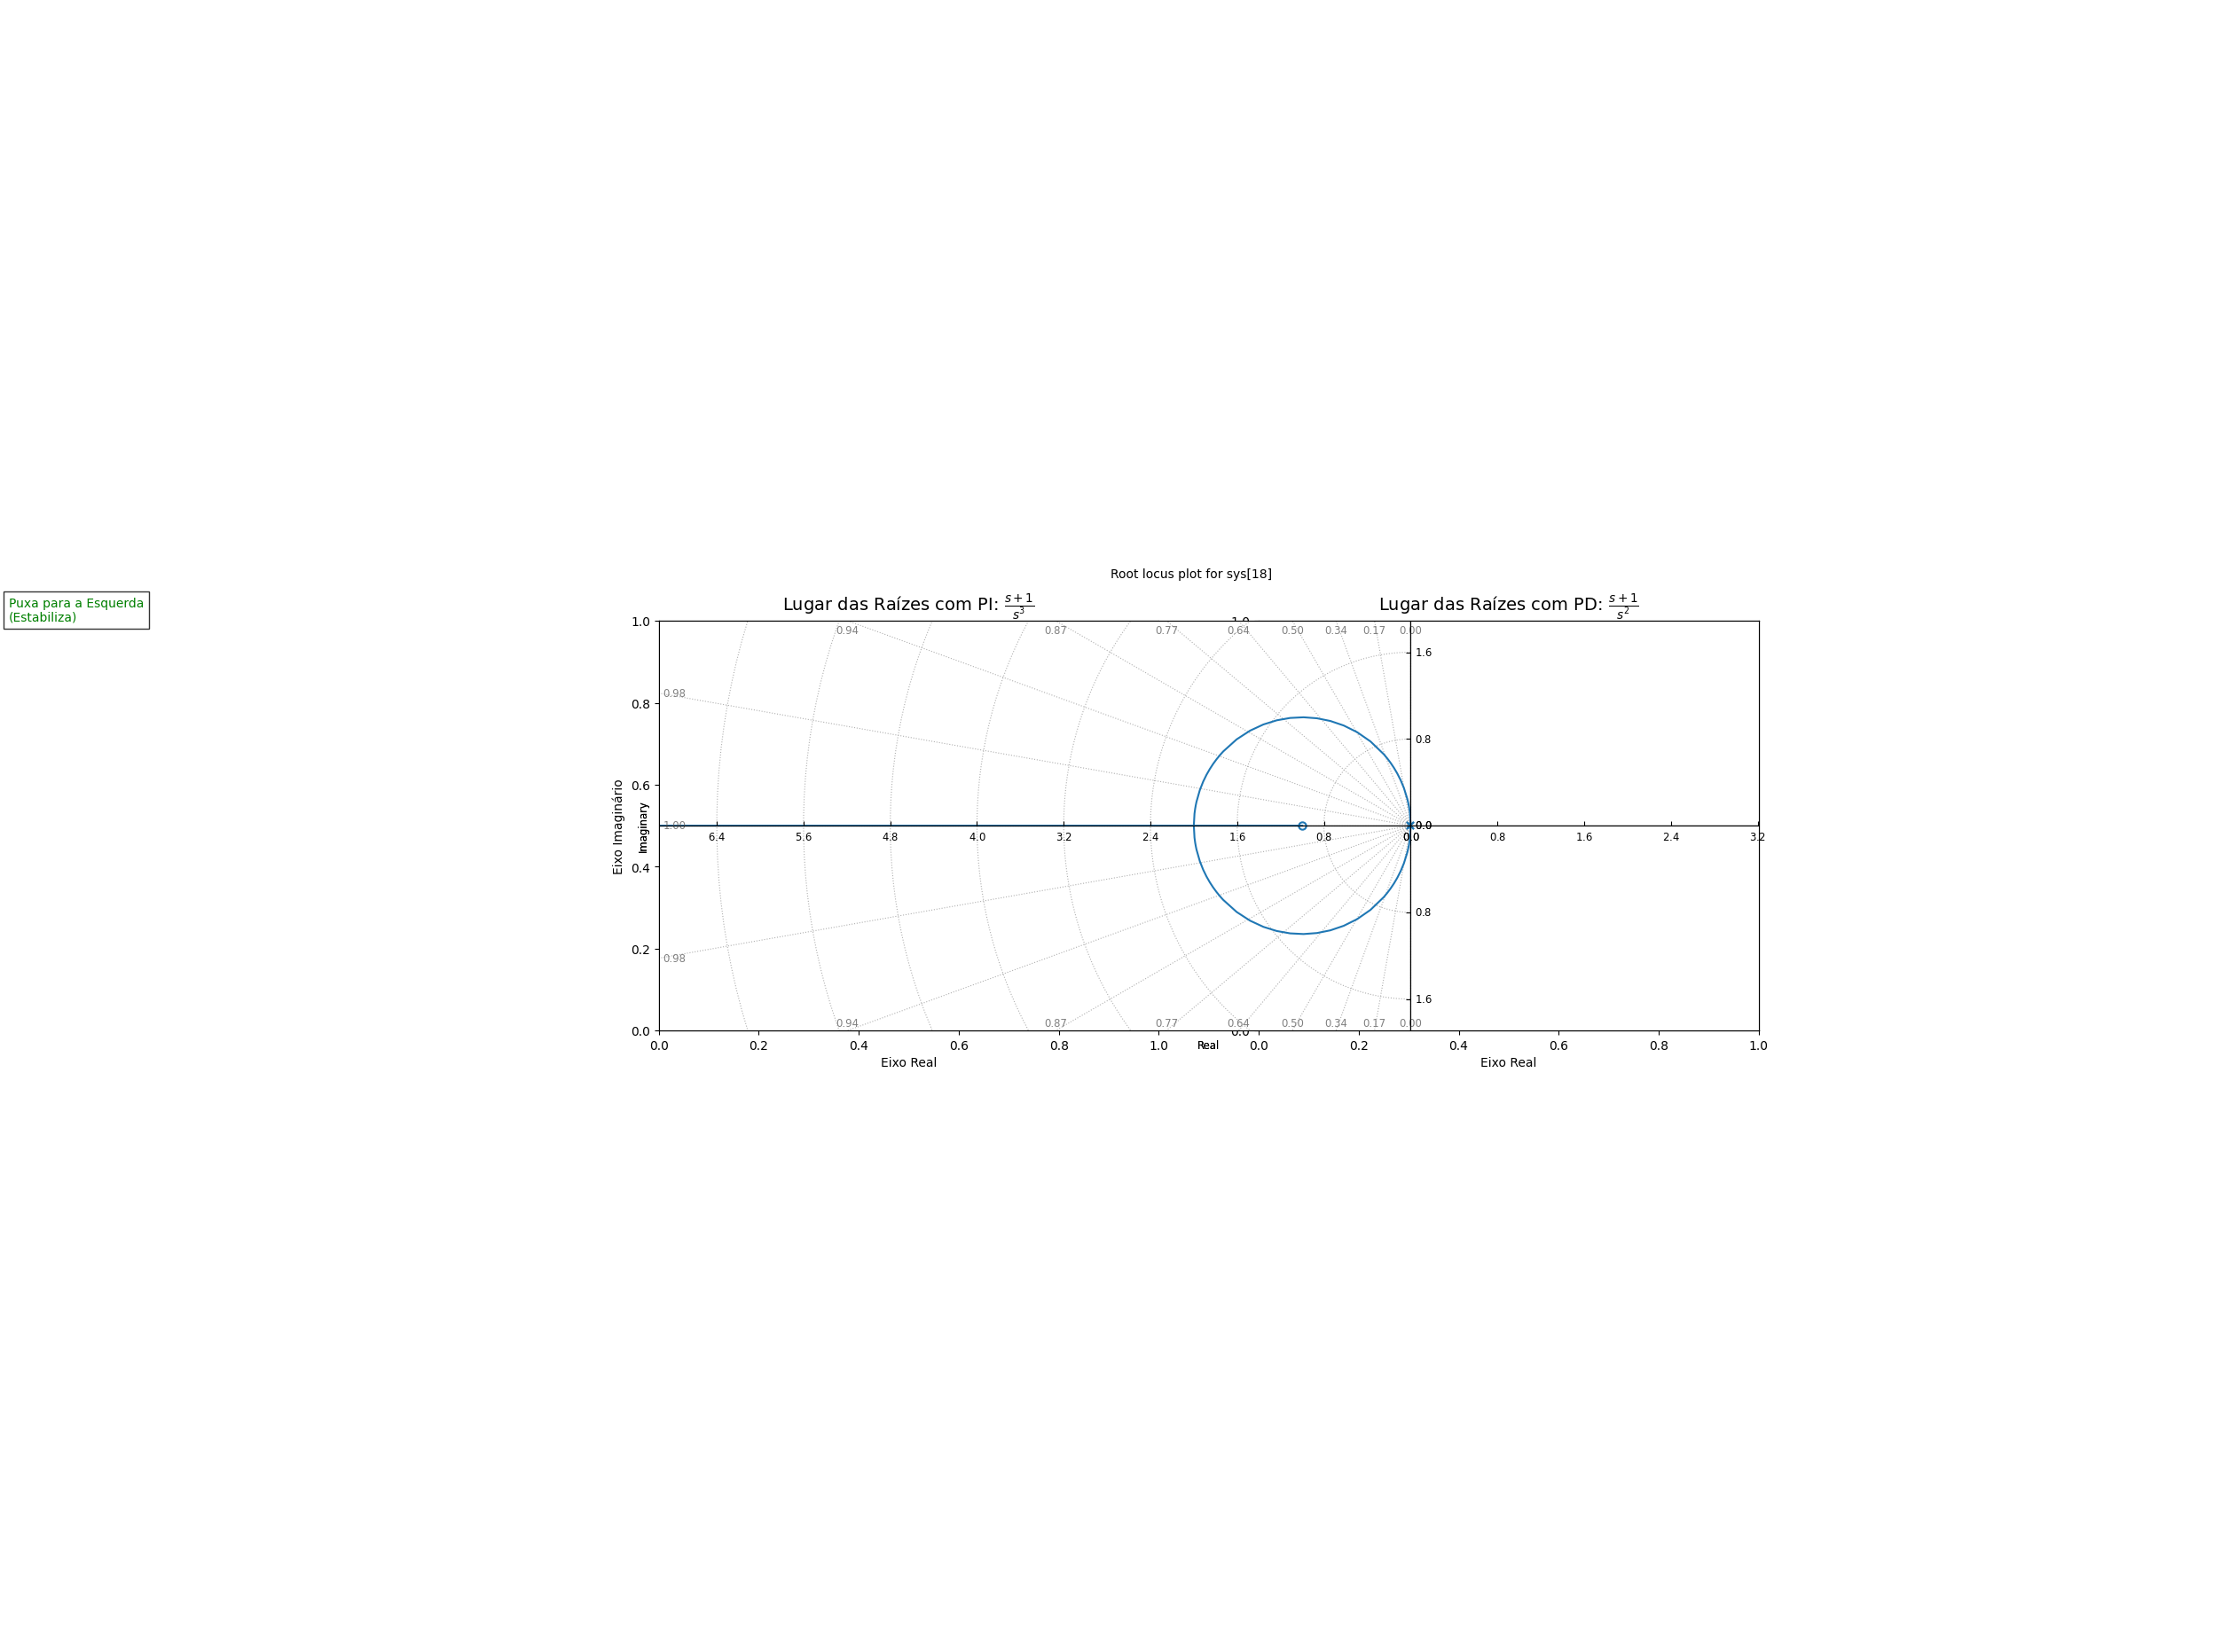


--- Análise dos Resultados ---
1. Com PI (Esquerda): O sistema possui 3 pólos na origem ou eixo imaginário.
   O LGR mostra ramos indo para o semiplano direito (instabilidade).
   O integrador aumentou o erro de fase, desestabilizando a planta 1/s^2.

2. Com PD (Direita): O zero adicionado pelo derivativo 'atrai' os pólos.
   O LGR é inteiramente puxado para a esquerda (estabilidade).
   Isso comprova que a ação Derivativa adiciona amortecimento ao sistema.


In [10]:
# 1. Definindo a Planta (Sistema Instável/Marginal)
# P(s) = 1 / s^2 (Ex: Massa sem atrito, satélite girando)
num_p = [1]
den_p = [1, 0, 0]
P = ct.tf(num_p, den_p)

# 2. Definindo os Controladores
# Controlador PI: Adiciona um pólo na origem (0) e um zero (ex: -1)
# C_pi(s) = (s + 1) / s
num_pi = [1, 1]
den_pi = [1, 0]
C_pi = ct.tf(num_pi, den_pi)

# Controlador PD: Adiciona apenas um zero (ex: -1)
# C_pd(s) = s + 1
num_pd = [1, 1]
den_pd = [1]
C_pd = ct.tf(num_pd, den_pd)

# 3. Criando as Malhas Abertas (L(s) = C(s) * P(s))
L_pi = C_pi * P  # Sistema com PI
L_pd = C_pd * P  # Sistema com PD

# 4. Plotando Lado a Lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: LGR com PI
plt.sca(ax1)
ct.root_locus(L_pi, grid=True)
# Usando raw strings (r'') para evitar warnings de sintaxe com LaTeX
ax1.set_title(r"Lugar das Raízes com PI: $\frac{s+1}{s^3}$", fontsize=14)
ax1.set_xlabel("Eixo Real")
ax1.set_ylabel("Eixo Imaginário")
# Nota explicativa no gráfico
ax1.text(0.5, 0.5, "Instável para\nqualquer K!", color='red',
         bbox=dict(facecolor='white', alpha=0.8))

# Gráfico 2: LGR com PD
plt.sca(ax2)
ct.root_locus(L_pd, grid=True)
ax2.set_title(r"Lugar das Raízes com PD: $\frac{s+1}{s^2}$", fontsize=14)
ax2.set_xlabel("Eixo Real")
ax2.set_ylabel("Eixo Imaginário")
# Nota explicativa no gráfico
ax2.text(-2.5, 1, "Puxa para a Esquerda\n(Estabiliza)", color='green',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n--- Análise dos Resultados ---")
print("1. Com PI (Esquerda): O sistema possui 3 pólos na origem ou eixo imaginário.")
print("   O LGR mostra ramos indo para o semiplano direito (instabilidade).")
print("   O integrador aumentou o erro de fase, desestabilizando a planta 1/s^2.")
print("\n2. Com PD (Direita): O zero adicionado pelo derivativo 'atrai' os pólos.")
print("   O LGR é inteiramente puxado para a esquerda (estabilidade).")
print("   Isso comprova que a ação Derivativa adiciona amortecimento ao sistema.")

### 3\. Comparação de Controladores: PD vs PI

**Objetivo:** Ver como a adição de um zero (PD) versus um pólo na origem (PI) altera radicalmente o formato do LGR e a estabilidade.

**Planta Base:** $P(s) = \frac{1}{s^2}$ (Duplo integrador, instável marginalmente)

  * **Controlador PI:** Adiciona pólo em $0$ e zero em $-z$. $C_{PI}(s) = \frac{s+1}{s}$
  * **Controlador PD:** Adiciona apenas um zero em $-z$. $C_{PD}(s) = s+1$

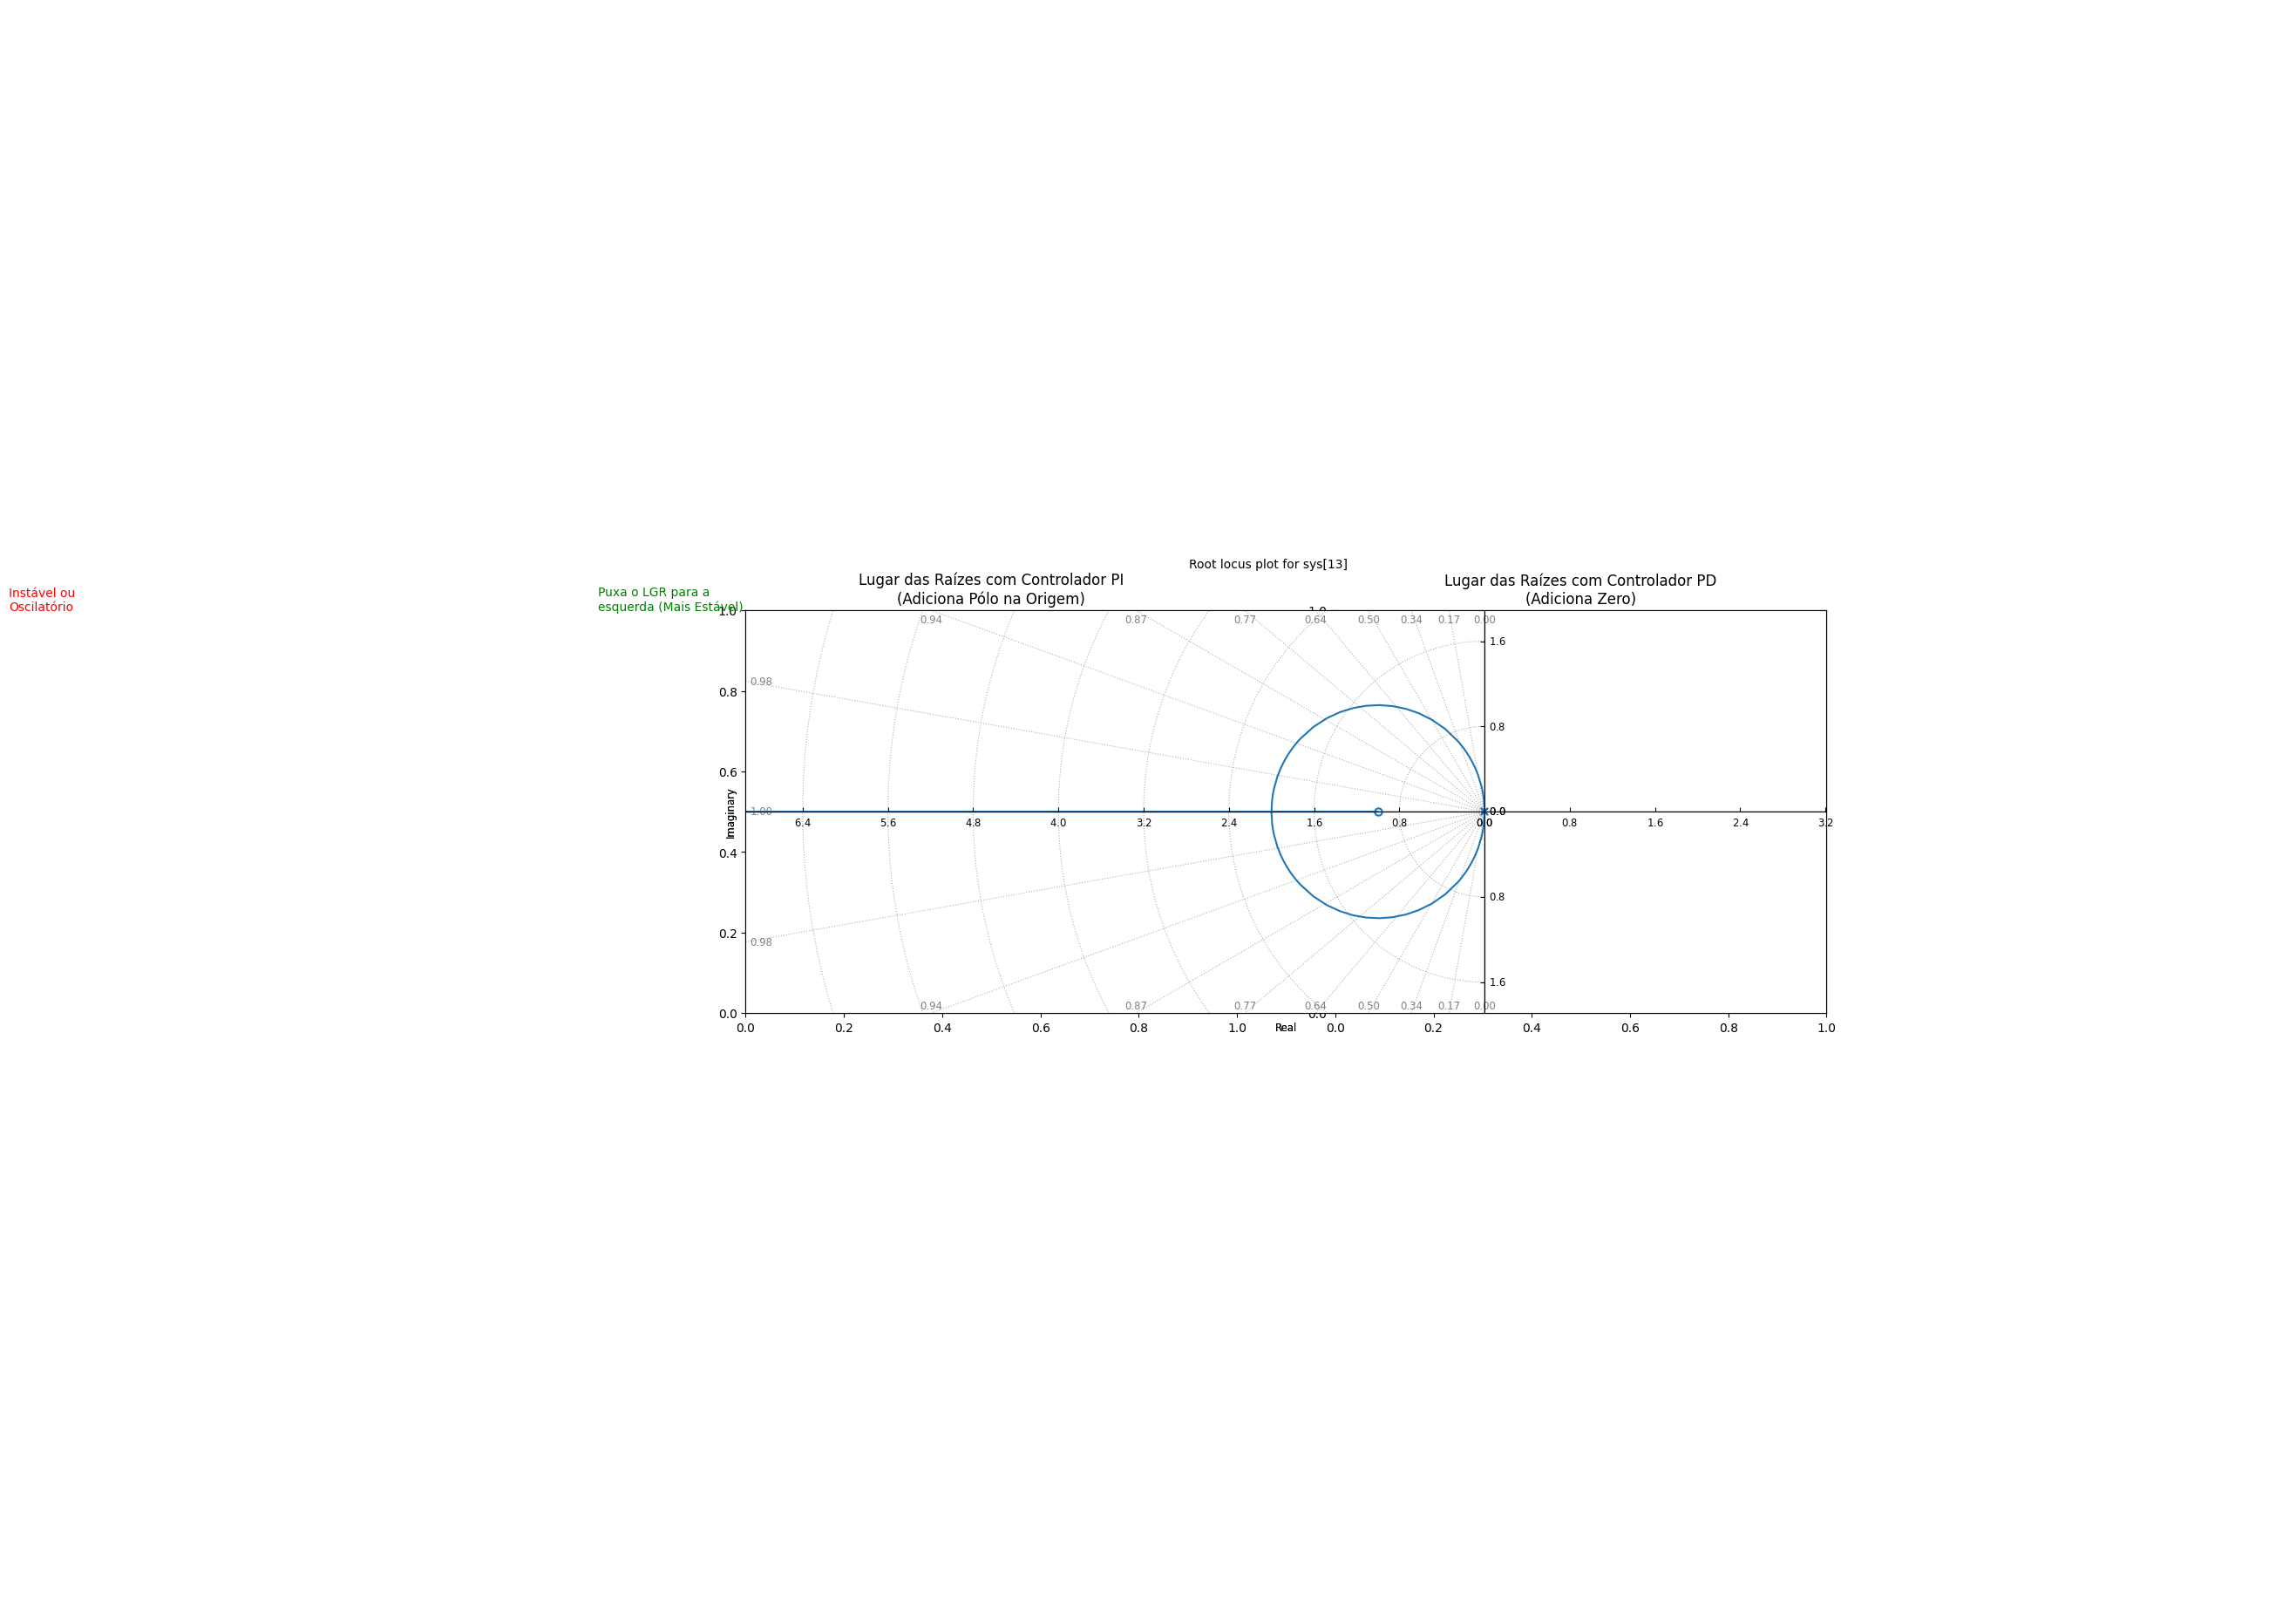

In [9]:
# Planta P(s) = 1/s^2
P = ct.tf([1], [1, 0, 0])

# Controlador PI: (s+1)/s
C_pi = ct.tf([1, 1], [1, 0])
L_pi = C_pi * P # Malha aberta com PI

# Controlador PD: (s+1)  (Implementado como s+1 na teoria, na prática precisa de filtro)
C_pd = ct.tf([1, 1], [1])
L_pd = C_pd * P # Malha aberta com PD

# Plotando
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# LGR com PI
plt.sca(ax1)
ct.root_locus(L_pi, grid=True)
ax1.set_title("Lugar das Raízes com Controlador PI\n(Adiciona Pólo na Origem)")
ax1.text(-1.5, 1, "Instável ou\nOscilatório", color='red')

# LGR com PD
plt.sca(ax2)
ct.root_locus(L_pd, grid=True)
ax2.set_title("Lugar das Raízes com Controlador PD\n(Adiciona Zero)")
ax2.text(-1.5, 1, "Puxa o LGR para a \nesquerda (Mais Estável)", color='green')

plt.show()

# Conclusão Visual:
# O PD (direita) puxa os ramos para o semiplano esquerdo, estabilizando o sistema rapidamente.
# O PI (esquerda) mantém ramos próximos ao eixo imaginário, podendo gerar oscilações lentas.